In [22]:
import sys, os, glob
import random
import numpy as np
import scipy as sp
from typing import List, Tuple, Callable, Any, Dict
import matplotlib.pyplot as plt

# from methods.PolyCG.polycg.SO3 import so3
# from methods.read_nuc_data import read_nucleosome_triads, GenStiffness
# from methods.free_energy import nucleosome_free_energy

np.set_printoptions(linewidth=250,precision=5,suppress=True)

### Methods

In [41]:
def read_sequences(fn: str): 
    seqs = []
    with open(fn, "r") as f:
        for line in f.readlines():
            if len(line.strip()) > 0:
                seqs.append(line.strip())
    return seqs

def histogram(data,density=True):
    bins = np.arange(np.min(data),np.max(data)+2)-0.5
    hist, edges = np.histogram(data,bins=bins,density=density)
    vals = 0.5*(edges[1:]+edges[:-1])
    return np.array((vals,hist)).T

def find_overlap(allseqs):
    if len(allseqs) < 2:
        return 0
    # find overlap
    noverlap = 0
    for o in range(1,len(allseqs[0])):
        match = True
        for i in range(o):
            if allseqs[0][-o+i] != allseqs[1][i]:
                match = False
                break
        if match:
            noverlap = o     
    return noverlap

def read_path_hist(path,num_files=None,print_outs=False):
    outs = sorted(glob.glob(path + '/*.npy'))
    sums = np.zeros(np.load(outs[0]).shape)
    
    if num_files is not None:
        random.shuffle(outs)
        outs = outs[:num_files]
    
    if print_outs:
        for out in outs:
            print(out)
        print(len(outs))
    for out in outs:
        vals = np.load(out)
        sums += vals
    return vals

def match_hists(hists,noverlap):
    if len(hists) == 1:
        return np.copy(hists[0])
    hists = [np.copy(hist) for hist in hists]
    ntot = len(hists[0]) + np.sum([len(hist)-noverlap for hist in hists[1:]])
    thist = np.zeros(ntot)
    thist[:len(hists[0])] = hists[0]
    curr_last = len(hists[0])-noverlap
    for i in range(1,len(hists)):
        fac = np.sum(hists[i-1][-noverlap:])/np.sum(hists[i][:noverlap])
        # fac = np.sum(hists[i-1][-noverlap:-2])/np.sum(hists[i][:noverlap-2])
        # fac = 1
        hists[i] *= fac
        thist[curr_last:curr_last+len(hists[i])] = hists[i]
        curr_last = curr_last+len(hists[i]) - noverlap
        print(fac)
    return thist




### Construct energy

In [83]:
mainname = 'Data/VerifyTheory/Sequence_Constant_Theory_MD'
# mainname = 'Data/VerifyTheory/Sequence_Constant_MMC_MD'
mainname = 'Data/VerifyTheory/Sequence_Constant_Theory_crystal'
# mainname = 'Data/VerifyTheory/Sequence_Constant_MMC_crystal'

seqfn = mainname + '.seq'
fefn  = mainname + '_fe.npy'

# generate FE
hist = read_path_hist(mainname,num_files=None) + 1
sampledfe = -np.log(hist/np.sum(hist))

print(hist)
for i in range(len(hist)):
    if hist[i] == 197:
        print(i)
        break

# theory
tfe  = np.load(fefn)[:,0]
mtfe = tfe - np.mean(tfe)

seqids = np.arange(len(sampledfe))

sfe = sampledfe + mtfe
sfe = sfe - np.mean(sfe)


for i in range(len(hist)):
    print(i,mtfe[i])




hist2 = read_path_hist(mainname,num_files=1,print_outs=True)
sfe2 = -np.log(hist2/np.sum(hist2))

sfe2 = sfe2 + mtfe
sfe2 = sfe2 - np.mean(sfe2)


# # rescale 
# tfe  = np.load(fefn)[:,0]
# tfes = tfe - np.mean(tfe)
# hist *= np.exp(-tfes)

# sampledfe = -np.log(hist/np.sum(hist))

# print(hist/np.sum(hist))


# ttheo = tfes
# runs = sorted(glob.glob(mainname+'/*.npy'))


basename = mainname.split('/')[-1]
savefn = 'Figs/' + basename

fig = plt.figure(figsize=(8.6/2.54,5./2.54))
ax1 = fig.add_subplot(111)

ax1.plot(seqids,sfe,lw=1,color='blue',zorder=2,label='MC')
ax1.plot(seqids,sfe,lw=1,color='red',zorder=2,label='MC (10)',ls='--')
ax1.plot(seqids,mtfe,lw=1,color='black',zorder=2,label='Theory')


tick_pad            = 2
axlinewidth         = 0.9
axtick_major_width  = 0.6
axtick_major_length = 1.6
tick_labelsize      = 6
label_fontsize      = 7

ax1.set_xlabel('Nucleosome Position',size = label_fontsize,labelpad=1)
ax1.set_ylabel(r'$\beta E$',size = label_fontsize,labelpad=1)

ax1.tick_params(axis="both",which='major',direction="in",width=axtick_major_width,length=axtick_major_length,labelsize=tick_labelsize,pad=tick_pad)

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(0.7)
    
plt.subplots_adjust(
    left=0.09,
    right=0.98,
    bottom=0.06,
    top=0.98,
    wspace=0.2,
    hspace=0.26)

ax1.legend(fontsize=8)

print(savefn)

plt.savefig(savefn + '.png',dpi=300,facecolor='white')
plt.show() 

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (140918327.py, line 89)

### Plot free energy

Figs/Sequence_Constant_MMC_crystal


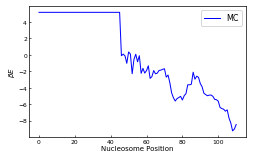

In [68]:

basename = mainname.split('/')[-1]
savefn = 'Figs/' + basename

fig = plt.figure(figsize=(8.6/2.54,5./2.54))
ax1 = fig.add_subplot(111)

ax1.plot(seqids,sfe-mtfe,lw=1,color='blue',zorder=2,label='MC')


tick_pad            = 2
axlinewidth         = 0.9
axtick_major_width  = 0.6
axtick_major_length = 1.6
tick_labelsize      = 6
label_fontsize      = 7

ax1.set_xlabel('Nucleosome Position',size = label_fontsize,labelpad=1)
ax1.set_ylabel(r'$\beta E$',size = label_fontsize,labelpad=1)

ax1.tick_params(axis="both",which='major',direction="in",width=axtick_major_width,length=axtick_major_length,labelsize=tick_labelsize,pad=tick_pad)

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(0.7)
    
plt.subplots_adjust(
    left=0.09,
    right=0.98,
    bottom=0.06,
    top=0.98,
    wspace=0.2,
    hspace=0.26)

ax1.legend(fontsize=8)

print(savefn)

plt.savefig(savefn + '_compare.png',dpi=300,facecolor='white')
plt.show() 